In [7]:
#Project: "Comprehensive Insurance Cost Analysis and Prediction" by DAVID

In [8]:
import pandas as pd

In [9]:
#Requirement practice for certification in Data Analysis with Python IBM.

In [10]:
#Objective: Analyze and predict insurance costs based on various attributes in the dataset.

In [11]:
#INSURANCE COST ANALYSIS

In [12]:
#Load real-life data into a pandas DataFrame, clean blank entries, perform EDA to identify key attributes affecting charges, develop single and multi-variable Linear Regression models, and refine with Ridge Regression.

In [13]:
#Pandas is used for data management, NumPy handles mathematical operations, scikit-learn supports machine learning and pipelines, Seaborn aids in data visualization, and Matplotlib provides additional plotting capabilities for in-depth analysis.

In [14]:
#All libraries needed for this project has been pre-installed.
#I will proceed with importing required libraries for this project
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

In [15]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'

In [16]:
#There are no headers in the columns imported
df = pd.read_csv(path, header=None)
print(df.head(10))

    0  1       2  3  4  5            6
0  19  1  27.900  0  1  3  16884.92400
1  18  2  33.770  1  0  4   1725.55230
2  28  2  33.000  3  0  4   4449.46200
3  33  2  22.705  0  0  1  21984.47061
4  32  2  28.880  0  0  1   3866.85520
5  31  1  25.740  0  ?  4   3756.62160
6  46  1  33.440  1  0  4   8240.58960
7  37  1  27.740  3  0  1   7281.50560
8  37  2  29.830  2  0  2   6406.41070
9  60  1  25.840  0  0  1  28923.13692


In [17]:
#The first step is to rename the headers using the parameters provided in the metadatapage
headers = ['age', 'gender', 'body_mass_index', 'no_of_children', 'smoker', 'region', 'charges']
df.columns = headers

In [18]:
#Printing data information will give me a general overview of the data type
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              2772 non-null   object 
 1   gender           2772 non-null   int64  
 2   body_mass_index  2772 non-null   float64
 3   no_of_children   2772 non-null   int64  
 4   smoker           2772 non-null   object 
 5   region           2772 non-null   int64  
 6   charges          2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB
None


In [19]:
#Based on the table, i will be replacing (?) as seen in most entries  with NaN 
#In doing this, i can further convert both datatypes for age and smoker to integers
df.replace('?', np.nan, inplace = True)

In [20]:
summary = df.describe()

In [21]:
print(summary)

            gender  body_mass_index  no_of_children       region       charges
count  2772.000000      2772.000000     2772.000000  2772.000000   2772.000000
mean      1.507215        30.701349        1.101732     2.559885  13261.369959
std       0.500038         6.129449        1.214806     1.130761  12151.768945
min       1.000000        15.960000        0.000000     1.000000   1121.873900
25%       1.000000        26.220000        0.000000     2.000000   4687.797000
50%       2.000000        30.447500        1.000000     3.000000   9333.014350
75%       2.000000        34.770000        2.000000     4.000000  16577.779500
max       2.000000        53.130000        5.000000     4.000000  63770.428010


In [22]:
#Two columns are missing, the age and the smoker column due to the dtype as object.
#I can use the include all function to still get the summary of all columns though. 
summary = df.describe(include='all')
print(summary)

         age       gender  body_mass_index  no_of_children smoker  \
count   2768  2772.000000      2772.000000     2772.000000   2765   
unique    47          NaN              NaN             NaN      2   
top       18          NaN              NaN             NaN      0   
freq     148          NaN              NaN             NaN   2201   
mean     NaN     1.507215        30.701349        1.101732    NaN   
std      NaN     0.500038         6.129449        1.214806    NaN   
min      NaN     1.000000        15.960000        0.000000    NaN   
25%      NaN     1.000000        26.220000        0.000000    NaN   
50%      NaN     2.000000        30.447500        1.000000    NaN   
75%      NaN     2.000000        34.770000        2.000000    NaN   
max      NaN     2.000000        53.130000        5.000000    NaN   

             region       charges  
count   2772.000000   2772.000000  
unique          NaN           NaN  
top             NaN           NaN  
freq            NaN        

In [23]:
#Replace missing values: using the mean for continuous attributes (e.g., age) and the mode for categorical attributes (e.g., smoker).
# smoker is a categorical attribute, replace with most frequent entry
#Handling missing data by replacing with mean or mode ensures completeness and accuracy in analysis, preventing bias and maintaining model performance.
is_smoker = df['smoker'].value_counts().idxmax()
df["smoker"].replace(np.nan, is_smoker, inplace=True)

# age is a continuous variable, replace with mean age
mean_age = df['age'].astype('float').mean(axis=0)
df["age"].replace(np.nan, mean_age, inplace=True)

# Update data types
df[["age","smoker"]] = df[["age","smoker"]].astype("int")

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              2772 non-null   int64  
 1   gender           2772 non-null   int64  
 2   body_mass_index  2772 non-null   float64
 3   no_of_children   2772 non-null   int64  
 4   smoker           2772 non-null   int64  
 5   region           2772 non-null   int64  
 6   charges          2772 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB
None


/var/folders/b7/qm354wp578zc04vwg8_4shxh0000gn/T/ipykernel_49408/1537369942.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["smoker"].replace(np.nan, is_smoker, inplace=True)
/var/folders/b7/qm354wp578zc04vwg8_4shxh0000gn/T/ipykernel_49408/1537369942.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

In [24]:
#To be sure about the effectiveness of the commands inputed, i will check the head and tails again since we have the right datatypes for each column based on the analysis.
print(df.head(35))
print(df.tail(35))

    age  gender  body_mass_index  no_of_children  smoker  region      charges
0    19       1           27.900               0       1       3  16884.92400
1    18       2           33.770               1       0       4   1725.55230
2    28       2           33.000               3       0       4   4449.46200
3    33       2           22.705               0       0       1  21984.47061
4    32       2           28.880               0       0       1   3866.85520
5    31       1           25.740               0       0       4   3756.62160
6    46       1           33.440               1       0       4   8240.58960
7    37       1           27.740               3       0       1   7281.50560
8    37       2           29.830               2       0       2   6406.41070
9    60       1           25.840               0       0       1  28923.13692
10   25       2           26.220               0       0       2   2721.32080
11   62       1           26.290               0       1       4

In [25]:
#Round the charges column to 2 decimal places and verify by printing the first 5 rows
df[["charges"]] = np.round(df[["charges"]],2)
print(df.head(5))

   age  gender  body_mass_index  no_of_children  smoker  region   charges
0   19       1           27.900               0       1       3  16884.92
1   18       2           33.770               1       0       4   1725.55
2   28       2           33.000               3       0       4   4449.46
3   33       2           22.705               0       0       1  21984.47
4   32       2           28.880               0       0       1   3866.86


(0.0, 66902.85800000001)

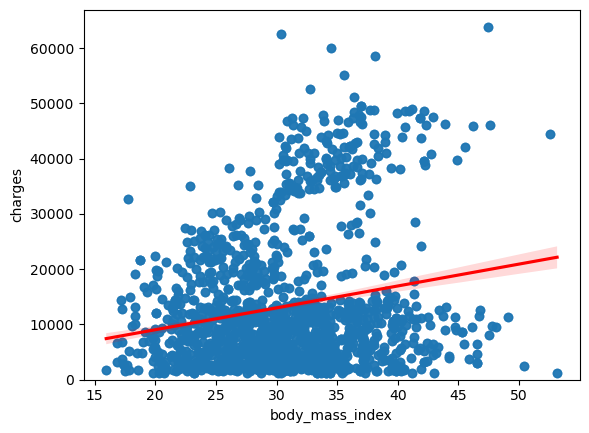

In [26]:
#Created a regression plot to analyze the relationship between charges and body mass index (BMI).
sns.regplot(x="body_mass_index", y="charges", data=df, line_kws={"color": "red"})
plt.ylim(0,)

<Axes: xlabel='smoker', ylabel='charges'>

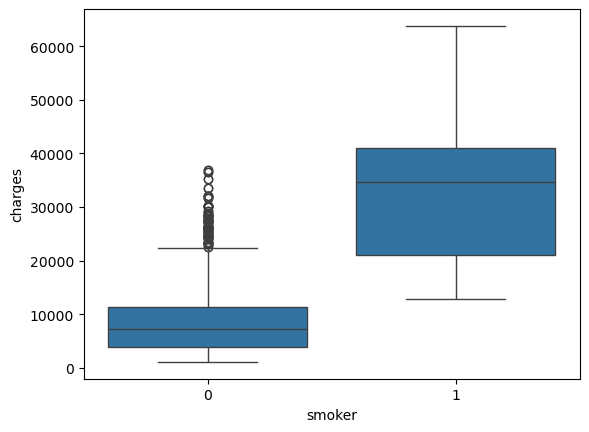

In [27]:
#Implement the box plot for charges with respect to smoker
sns.boxplot(x="smoker", y="charges", data=df)

In [29]:
#Correlation matrix of tha dataset
print(df.corr())

                      age    gender  body_mass_index  no_of_children  \
age              1.000000 -0.026046         0.113048        0.037574   
gender          -0.026046  1.000000         0.042924        0.016020   
body_mass_index  0.113048  0.042924         1.000000       -0.001492   
no_of_children   0.037574  0.016020        -0.001492        1.000000   
smoker          -0.023286  0.082326         0.011489        0.006362   
region          -0.007167  0.022213         0.271119       -0.025717   
charges          0.298624  0.062837         0.199846        0.066442   

                   smoker    region   charges  
age             -0.023286 -0.007167  0.298624  
gender           0.082326  0.022213  0.062837  
body_mass_index  0.011489  0.271119  0.199846  
no_of_children   0.006362 -0.025717  0.066442  
smoker           1.000000  0.054077  0.788783  
region           0.054077  1.000000  0.054058  
charges          0.788783  0.054058  1.000000  


In [30]:
#The strongest predictor of insurance charges in this dataset is whether the individual is a smoker, followed by age and BMI. Gender, number of children, and region have minimal impact on insurance charges.
#This will imply using linear reqression model with smoker attributes, we can predict the charges.
X = df[['smoker']]
Y = df['charges']
lm = LinearRegression()
lm.fit(X,Y)
print(lm.score(X, Y))

0.6221791733924185


In [31]:
#The number 0.6221791733924185 represents the R-squared value (coefficient of determination) of the linear regression model. It implies that approximately 62.2% of the variance in insurance charges can be explained by the smoker attribute alone. This indicates a moderate level of explanatory power of the model with respect to predicting charges based on smoking status.

In [32]:
# definition of Y and lm remain same as used in last cell. 
Z = df[["age", "gender", "body_mass_index", "no_of_children", "smoker", "region"]]
lm.fit(Z,Y)
print(lm.score(Z, Y))

0.7504083820289634


In [33]:
#The R-squared value of 0.750 means that approximately 75.0% of the variance in insurance charges can be explained by using all attributes in the dataset, compared to 62.2% when using only the smoker attribute. This improvement indicates that the additional attributes provide a better overall explanation for the variability in insurance charges, suggesting a more robust and accurate model.

In [34]:
# Y and Z use the same values as defined in previous cells 
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)
print(r2_score(Y,ypipe))

0.845248299883597


In [35]:
#This higher R-squared value demonstrates that the model can more effectively capture and explain the variability in insurance charges, resulting in a more accurate prediction.

In [36]:
#Model refinement
# Z and Y hold same values as in previous cells
x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size=0.2, random_state=1)

In [37]:
# x_train, x_test, y_train, y_test hold same values as in previous cells
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
print(r2_score(y_test,yhat))

0.6760807731582404


In [38]:
#The R-squared value of 0.676 means that approximately 67.6% of the variance in insurance charges is explained by the Ridge regression model on the testing data. This score indicates how well the model generalizes to new, unseen data
#Model Implication: The Ridge regression model provides a moderately good fit, but there may still be room for improvement. This score implies that while Ridge regression improves over simpler models, it may not fully capture all the nuances of the data without additional feature engineering or parameter tuning.

In [39]:
# x_train, x_test, y_train, y_test hold same values as in previous cells
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))

0.783563110760815


In [40]:
#Model Performance: The result demonstrates that polynomial transformations can improve model performance by better capturing relationships in the data, though it is still slightly lower than the score obtained with PolynomialFeatures() and LinearRegression() (which was 0.845). This suggests that while polynomial transformations are beneficial, the choice of regression method and hyperparameters also plays a critical role in model performance.

In [ ]:
#SUMMARIZED REPORT ON THE SLIDE ATTACHED TO THIS FILE